# Retweet Graph

In [1]:
import csv
# import community as community_louvain
import networkx as nx
from matplotlib import pyplot as plt
import numpy as np

In [2]:
with open('../data/graph.retweets.0301-0307.nodes.csv', 'r') as f:
    f = csv.reader(f)
    # Retrieve the data (using Python list comprhension and list slicing to remove the header row)
    nodes = [n for n in f][1:]                                       

with open('../data/graph.retweets.0301-0307.edges.csv', 'r') as edgecsv: # Open the file
    edgereader = csv.reader(edgecsv) # Read the csv     
    edges = [tuple(e) for e in edgereader][1:] # Retrieve the data

In [3]:
len(nodes), len(edges)

(2909026, 7175762)

In [431]:
nodes[0], edges[0]

(['966500444632596480', 'into_the_brush', '88197'],
 ('1041718006747820032', '1106602803521306627', '464'))

In [423]:
len([e for e in edges if int(e[-1])>2])

195891

In [457]:
nodesN = 1000000
top_nodes = nodes[:nodesN]
node_ids = [n[0] for n in top_nodes] # Get a list of only the node names
node_names = {n[0]:n[1] for n in top_nodes}
node_weights = {n[0]:int(n[2]) for n in top_nodes}

node_set = set(node_ids)
edge_set = [e for e in edges if e[0] in node_set and e[1] in node_set and int(e[2])>1]
edge_ids = [(e[0], e[1]) for e in edge_set]
edge_weights = {(e[0], e[1]):int(e[2]) for e in edge_set}

print(len(node_ids), 'nodes')
print(len(edge_ids), 'edges')

1000000 nodes
548469 edges


In [436]:
sorted(node_weights.items(), key = lambda x: x[1], reverse=True)

[('966500444632596480', 88197),
 ('21059255', 84941),
 ('1085522008471818240', 78701),
 ('25073877', 67858),
 ('78523300', 59672),
 ('813286', 57846),
 ('1969808197', 56864),
 ('190318791', 56787),
 ('292929271', 55509),
 ('1651522832', 49865),
 ('224805342', 48270),
 ('19739126', 47977),
 ('2985479932', 45257),
 ('2863558530', 44244),
 ('1626294277', 43734),
 ('927180702948450304', 39395),
 ('759251', 38450),
 ('836612413755691012', 36482),
 ('14247236', 35373),
 ('44196397', 35048),
 ('4207961', 33840),
 ('970402920087908352', 32850),
 ('817661098988019712', 31438),
 ('117865176', 31141),
 ('1652541', 29515),
 ('830908366377611266', 29304),
 ('16129920', 28620),
 ('15464697', 28466),
 ('4428332052', 27558),
 ('2769334650', 26524),
 ('2874187354', 25478),
 ('14499829', 25453),
 ('18839785', 25257),
 ('4832275484', 24453),
 ('965406583911014403', 23055),
 ('47215171', 22822),
 ('1123488680', 22673),
 ('95485773', 22550),
 ('22771961', 21915),
 ('11134252', 21784),
 ('34713362', 21607),

### Build the Graph

In [470]:
import networkx as nx

# graph_nodes = list(toptags.keys())
# graph_edges = list(edges.keys())

G = nx.DiGraph()
G.add_nodes_from(node_ids)
G.add_edges_from(edge_ids)

print(nx.info(G))

nx.set_node_attributes(G, node_weights, 'weight')
nx.set_node_attributes(G, node_names, 'handles')
nx.set_edge_attributes(G, edge_weights, 'weight')

# If your Graph has more than one component, this will return False:
# print(nx.is_connected(G))

Name: 
Type: DiGraph
Number of nodes: 1000000
Number of edges: 548469
Average in degree:   0.5485
Average out degree:   0.5485


In [472]:
# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.weakly_connected_components(G)
# print("{} connected components".format(len(components)))
largest_component = max(components, key=len)
subgraph = G.subgraph(largest_component)

In [471]:
print([len(c) for c in sorted(nx.weakly_connected_components(G),key=len, reverse=True)][:50])

[233329, 65, 52, 47, 36, 28, 27, 26, 23, 20, 20, 20, 20, 20, 20, 19, 19, 19, 18, 18, 17, 17, 15, 15, 15, 15, 13, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]


In [474]:
print(nx.info(subgraph))

Name: 
Type: DiGraph
Number of nodes: 233329
Number of edges: 535578
Average in degree:   2.2954
Average out degree:   2.2954


In [473]:
communities_lpa = community.asyn_lpa_communities(subgraph, weight='weight')

In [475]:
communities_lpa = list(communities_lpa)
print([len(c) for c in communities_lpa][-50:])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [476]:
communities_lpa_top = sorted(communities_lpa, key=lambda x: len(x), reverse=True)
print([len(c) for c in communities_lpa_top][:50])

[353, 142, 108, 106, 91, 85, 72, 69, 48, 33, 32, 31, 29, 27, 27, 26, 26, 26, 26, 26, 25, 25, 24, 23, 22, 21, 20, 20, 19, 18, 18, 18, 17, 17, 17, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14]


In [477]:
modularity_dict = {} # Create a blank dictionary
for i,c in enumerate(communities_lpa): # Loop through the list of communities, keeping track of the number for the community
    for name in c: # Loop through each person in a community
        modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

# Now you can add modularity information like we did the other metrics
nx.set_node_attributes(subgraph, modularity_dict, 'modularity')

In [491]:
top5 = G.subgraph(communities_lpa_top[0] | 
                    communities_lpa_top[1] |
                    communities_lpa_top[2] |
                    communities_lpa_top[3] |
                    communities_lpa_top[4])

In [498]:
k = 20
sub = set()
for i in range(k):
    sub = sub | communities_lpa_top[i]

topk = G.subgraph(sub)
nx.write_gexf(topk, 'retweets.top{}.0301-0307.gexf'.format(k))

In [494]:
nx.write_gexf(top5, 'retweets.top5.0301-0307.gexf')

### Save graph for Gephi import

In [ ]:
nx.write_gexf(G, 'retweets.0301-0307.gexf')

# Hashtag Graph

In [138]:
from collections import Counter, defaultdict

In [5]:
hashtags = Counter()
hashtag_spelling = defaultdict(set)
user_tags = defaultdict(set)
user_names = defaultdict(str)

with open('../data/tweets.0301-0331.usa.csv', 'r') as f:
    for line in f:
        if line.startswith('tweetId'):
            continue
        
        data = line.split(',')
        userId = data[2]
        userName = data[3]
        user_names[userId] = userName
        
        tags = data[12].split()
        for tag in tags:
            hashtag_spelling[tag.lower()].add(tag)
            hashtags[tag.lower()] += 1
            user_tags[userId].add(tag.lower())

In [139]:
len(hashtags), len(user_tags)

(88497, 152824)

In [19]:
len([h for h in hashtags if hashtags[h]>=10])

5195

In [121]:
common = {'coronavirus', 'covid19', 'covidー19', 
          'covid_19', 'covid', 'covid2019', 'coronavirusoutbreak',
         'coronaoutbreak', 'coronavirusupdate', 'coronavirusupdates',
         'pandemic', 'coronaviruspandemic', 'socialdistancing',
         'smartnews', 'corona', 'pandemic', 'news', 'breaking', 'coronavirususa'}
toptags = Counter({h:hashtags[h] for h in hashtags if hashtags[h]>=10 and not h in common})

Create an edges array (tag2, tag2): # users that use both

In [122]:
edges = defaultdict(int)
for userId, tags in user_tags.items():
    tags = list(tags)
    for i in range(len(tags)):
        for j in range(i+1, len(tags)):
            if toptags[tags[i]] == 0 or toptags[tags[j]]==0:
                continue
            else:
                edges[(tags[i], tags[j])] += 1
        

In [123]:
len(toptags), len(edges)

(5177, 457751)

In [124]:
toptags.most_common(50)

[('china', 4091),
 ('trump', 3227),
 ('stayhome', 2441),
 ('quarantinelife', 2241),
 ('cdc', 2124),
 ('trumpvirus', 2029),
 ('foxnews', 1866),
 ('health', 1735),
 ('stayathome', 1702),
 ('flattenthecurve', 1404),
 ('maga', 1358),
 ('washyourhands', 1332),
 ('quarantine', 1325),
 ('trumpviruscoverup', 1304),
 ('usa', 1300),
 ('virus', 1160),
 ('coronavirusseattle', 1128),
 ('supertuesday', 1068),
 ('iran', 1059),
 ('covid19us', 1043),
 ('coronapocalypse', 1019),
 ('wuhan', 1013),
 ('healthcare', 1013),
 ('publichealth', 989),
 ('italy', 976),
 ('who', 888),
 ('sarscov2', 862),
 ('coronaalert', 858),
 ('travel', 855),
 ('lockdown', 851),
 ('coronaviruschallenge', 813),
 ('chinesevirus', 804),
 ('flu', 798),
 ('nyc', 796),
 ('business', 761),
 ('economy', 714),
 ('wuhanvirus', 702),
 ('stocks', 692),
 ('coronavirusus', 682),
 ('coronavid19', 671),
 ('fakenews', 647),
 ('politics', 645),
 ('trumpliesaboutcoronavirus', 621),
 ('stockmarket', 613),
 ('wuhancoronavirus', 608),
 ('covid19usa',

In [129]:
for e in graph_edges:
    if toptags[e[0]]==0 or toptags[e[1]]==0:
        print(e)
        break

In [120]:
sorted(edges.items(), key=lambda x: x[1], reverse=True)[:100]

[(('wuhan', 'china'), 179),
 (('who', 'cdc'), 174),
 (('trump', 'cdc'), 145),
 (('stayhome', 'staysafe'), 145),
 (('iran', 'china'), 144),
 (('quarantine', 'quarantinelife'), 143),
 (('china', 'italy'), 142),
 (('maga', 'kag'), 138),
 (('china', 'trump'), 126),
 (('china', 'cdc'), 126),
 (('stayhome', 'flattenthecurve'), 103),
 (('who', 'china'), 100),
 (('pence', 'trump'), 96),
 (('economy', 'china'), 95),
 (('coronavirususa', 'coronavirusus'), 95),
 (('italy', 'china'), 93),
 (('maga', 'trump'), 92),
 (('china', 'us'), 91),
 (('usa', 'trump'), 89),
 (('coronavirususa', 'cdc'), 89),
 (('coronavirususa', 'trump'), 87),
 (('china', 'virus'), 87),
 (('usa', 'china'), 87),
 (('iran', 'italy'), 86),
 (('quarantine', 'stayhome'), 86),
 (('health', 'healthcare'), 85),
 (('china', 'usa'), 84),
 (('china', 'japan'), 84),
 (('coronaviruswashington', 'coronavirusseattle'), 83),
 (('trumpviruscoverup', 'trumpvirus'), 83),
 (('gop', 'trump'), 82),
 (('coronavirususa', 'covid19us'), 80),
 (('health

In [128]:
graph_nodes = list(toptags.keys())
graph_edges = list(edges.keys())

In [108]:
len(nodes)

5178

In [130]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(graph_nodes)
G.add_edges_from(graph_edges)

print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 5177
Number of edges: 422768
Average degree: 163.3255


In [131]:
nx.set_node_attributes(G, toptags, 'weight')
nx.set_edge_attributes(G, edges, 'weight')

In [68]:
# If your Graph has more than one component, this will return False:
print(nx.is_connected(G))

False


In [132]:
# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(G)
largest_component = max(components, key=len)

# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density.
#

subgraph = G.subgraph(largest_component)
# diameter = nx.diameter(subgraph)
# print("Network diameter of largest component:", diameter)

In [133]:
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

[5131,
 3,
 3,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [134]:
subgraph = G.subgraph(largest_component)

In [84]:
from networkx.algorithms import community
communities = community.greedy_modularity_communities(subgraph)

In [135]:
communities = community.asyn_lpa_communities(subgraph, weight='weight')

In [136]:
modularity_dict = {} # Create a blank dictionary
for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
    for name in c: # Loop through each person in a community
        modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

# Now you can add modularity information like we did the other metrics
nx.set_node_attributes(G, modularity_dict, 'modularity')

In [90]:
for i,c in enumerate(communities): # Loop through the list of communities
    if i > 0:
        print('Class '+str(i)+':', list(c)) # Print out the classes and their members
        print([(tag, toptags[tag]) for tag in list(c)])

Class 1: ['productdevelopment', 'dubnation', 'customerdevelopment', 'farmersmarket', 'agiledevelopment', 'leanstartup', 'sfnt', 'dao', 'om', 'brics', 'g20', 'tao']
[('productdevelopment', 11), ('dubnation', 14), ('customerdevelopment', 10), ('farmersmarket', 15), ('agiledevelopment', 10), ('leanstartup', 10), ('sfnt', 10), ('dao', 11), ('om', 10), ('brics', 10), ('g20', 20), ('tao', 10)]
Class 2: ['israelites', '12tribesofisrael', 'negroes', 'apttmhgi', 'blackmedia', 'b1', 'newblackmedia', 'hebrewisraelites', 'yisrael', 'hebrew']
[('israelites', 16), ('12tribesofisrael', 12), ('negroes', 12), ('apttmhgi', 12), ('blackmedia', 12), ('b1', 13), ('newblackmedia', 12), ('hebrewisraelites', 13), ('yisrael', 12), ('hebrew', 12)]
Class 3: ['kaya', 'wp', 'whatitsgonnabe', 'rsktkrs', 'pray4me', 'iaintdoneyet', 'newbrooklyn', 'thewolfofflossstreet']
[('kaya', 12), ('wp', 12), ('whatitsgonnabe', 12), ('rsktkrs', 12), ('pray4me', 12), ('iaintdoneyet', 12), ('newbrooklyn', 12), ('thewolfofflossstree

In [137]:
Counter(modularity_dict.values())

Counter({0: 5107, 1: 2, 2: 2, 3: 8, 4: 2, 5: 2, 6: 3, 7: 5})

## Hashtag Topics Graph


03.02: Instead of using num tweets as edge weights - use number of unique users who use the 2 hashtags in one tweet

In [368]:
from networkx.algorithms import community

In [376]:
hashtags = Counter()
hashtag_spelling = defaultdict(set)
tweet_tags = []

user_tags = defaultdict(set)
user_names = defaultdict(str)

with open('../data/tweets.0301-0331.usa.csv', 'r') as f:
    for line in f:
        if line.startswith('tweetId'):
            continue
        
        data = line.split(',')
        userId = data[2]
        userName = data[3]
        user_names[userId] = userName
        
        if len(data[12]) > 0:
            user_tags[userId].add(data[12])
        
        tags = data[12].split()
        tags_lower = []
        for tag in tags:
            hashtag_spelling[tag.lower()].add(tag)
            hashtags[tag.lower()] += 1
            tags_lower.append(tag.lower())
        tweet_tags.append(tags_lower)


In [169]:
max(len(tweet_tags[i]) for i in range(len(tweet_tags)))

40

First, remve the really common hashtags

In [381]:
list(user_tags['59388229'])[0]

'CoronaVirus TheHulk'

In [740]:
import re
# exlude tags like #tuesdaythoughts, #wednesdayvibes, #tuesdaymorning, #tuesdaymotivation
days_of_week = ['monday', 'tuesday', 'wednesday', 'thursday','friday','saturday','sunday']

common = {'coronavirus', 'covid19', 'covidー19', 'covd19', 
          'covid_19', 'covid', 'covid2019', 'coronavirusoutbreak',
         'coronaoutbreak', 'coronavirusupdate', 'coronavirusupdates',
         'pandemic', 'coronaviruspandemic','socialdistancing', 'china', 'trump','usa', 'virus',
         'smartnews', 'corona', 'pandemic', 'news', 'breaking', 'coronavirususa',
            'coronaalert', 'coronvirus', 'coronovirius','coronovirus','coronavius', 'caronavirus',
          'coronavid19', 'breakingnews', 'foxnews', 'cdc'
         }
toptags = Counter({h:hashtags[h] for h in hashtags if (
    hashtags[h]>=10 
   and not h in common 
   and not h.startswith("coronavirus") # removing all tags like coronavirusseattle coronavirusnyc seattle coronavirusflorida coronavirustexas
   and not re.search(r'\b({})'.format('|'.join(days_of_week)), h, flags=re.IGNORECASE)
   and not h.endswith('news')
   and not h.startswith('sars') 
)})
print(f"{len(toptags)} tags remaining")

# TODO! REMOVE ALL HASHTAGS THAT WERE USED AS SEEDS!!!! DUHH!!!

4946 tags remaining


In [634]:
print(toptags.most_common(100))

[('stayhome', 2441), ('quarantinelife', 2241), ('cdc', 2124), ('trumpvirus', 2029), ('foxnews', 1866), ('health', 1735), ('stayathome', 1702), ('flattenthecurve', 1404), ('maga', 1358), ('washyourhands', 1332), ('quarantine', 1325), ('trumpviruscoverup', 1304), ('supertuesday', 1068), ('iran', 1059), ('covid19us', 1043), ('coronapocalypse', 1019), ('wuhan', 1013), ('healthcare', 1013), ('publichealth', 989), ('italy', 976), ('who', 888), ('sarscov2', 862), ('travel', 855), ('lockdown', 851), ('chinesevirus', 804), ('flu', 798), ('nyc', 796), ('business', 761), ('economy', 714), ('wuhanvirus', 702), ('stocks', 692), ('fakenews', 647), ('politics', 645), ('trumpliesaboutcoronavirus', 621), ('stockmarket', 613), ('wuhancoronavirus', 608), ('covid19usa', 607), ('trumppandemic', 604), ('outbreak', 592), ('cpac2020', 586), ('california', 577), ('topbuzz', 577), ('seattle', 569), ('breakingnews', 562), ('trump2020', 561), ('staysafe', 557), ('tech', 548), ('chinavirus', 544), ('pencedemic', 5

Text(0.5, 0, 'Hashtag rank')

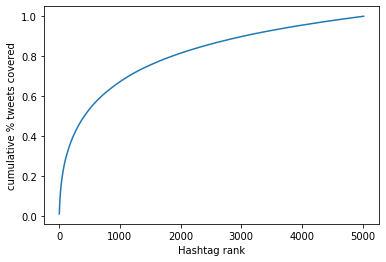

In [635]:
yvals = np.array([x[1] for x in toptags.most_common()])/sum(toptags.values())
plt.plot(np.cumsum(yvals))
plt.ylabel('cumulative % tweets covered')
plt.xlabel('Hashtag rank')

Edges connect hashtags to each other. Two hashtags are connected if they are used together in the same tweet. Edge weight = number of tweets that use both hashtags

**(1) Edge weight = number of tweets that contain both the tags**

In [249]:
edges = defaultdict(int)
for tags in tweet_tags:
    for i in range(len(tags)):
        for j in range(i+1, len(tags)):
            if toptags[tags[i]] == 0 or toptags[tags[j]]==0:
                continue
            else:
                # edge direction does not matter
                if edges[(tags[j], tags[i])] > 0:
                    edges[(tags[j], tags[i])] += 1
                else:
                    edges[(tags[i], tags[j])] += 1

# remove edges with weight < 3
edges = {e:edges[e] for e in edges if edges[e]>2}

**(2) Edge weight = number of unique users who use the two tags together in at least one tweet**

Using `user_tags` which maps each userId to a set of tag combinatinos

In [741]:
edges = defaultdict(int)
for userId in user_tags:
    for tag_str in list(user_tags[userId]):
        tags = [t.lower() for t in tag_str.split()]

        for i in range(len(tags)):
            for j in range(i+1, len(tags)):
                if toptags[tags[i]] == 0 or toptags[tags[j]]==0:
                    continue
                else:
                    # edge direction does not matter
                    if edges[(tags[j], tags[i])] > 0:
                        edges[(tags[j], tags[i])] += 1
                    else:
                        edges[(tags[i], tags[j])] += 1

# remove edges with weight < 3
edges = {e:edges[e] for e in edges if edges[e]>2}
print(f"{len(edges)} edges")

16502 edges


In [638]:
sorted(edges.items(), key=lambda x: x[1], reverse=True)[:100]

[(('maga', 'kag'), 223),
 (('who', 'cdc'), 204),
 (('stocks', 'investing'), 172),
 (('stayhome', 'staysafe'), 156),
 (('stocks', 'trading'), 142),
 (('quarantinelife', 'quarantine'), 139),
 (('trading', 'investing'), 132),
 (('qanon', 'maga'), 120),
 (('health', 'healthcare'), 110),
 (('maga', 'trump2020'), 109),
 (('infectiousdisease', 'travelalert'), 106),
 (('stockmarket', 'stocks'), 105),
 (('batvirus', 'batvirus'), 105),
 (('flattenthecurve', 'stayhome'), 103),
 (('cnn', 'msnbc'), 100),
 (('trump2020', 'kag'), 99),
 (('italy', 'iran'), 98),
 (('cnn', 'foxnews'), 98),
 (('stayhome', 'quarantine'), 96),
 (('trumpvirus', 'trumpviruscoverup'), 93),
 (('trumpliedpeopledied', 'trumppandemic'), 92),
 (('trumppandemic', 'trumpvirus'), 91),
 (('jackson_rys2020', 'jackson_rys2020'), 91),
 (('health', 'wellness'), 90),
 (('wuhanvirus', 'chinesevirus'), 89),
 (('trumpvirus', 'trumpvirus'), 88),
 (('qanon', 'wwg1wga'), 87),
 (('maga', 'kag2020'), 85),
 (('oigetit', 'fakenewsfilter'), 84),
 (('

**Build Graph**

In [742]:
import networkx as nx

graph_nodes = list(toptags.keys())
graph_edges = list(edges.keys())

G = nx.Graph()
G.add_nodes_from(graph_nodes)
G.add_edges_from(graph_edges)

print(nx.info(G))

nx.set_node_attributes(G, toptags, 'weight')
nx.set_edge_attributes(G, edges, 'weight')

# If your Graph has more than one component, this will return False:
print(nx.is_connected(G))

Name: 
Type: Graph
Number of nodes: 4946
Number of edges: 16502
Average degree:   6.6729
False


Look at the size of different components

In [743]:
print([len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)][:20])

[3364, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2]


Since most disconnected components only have 1 hashtag, lets focus only on the largest component

In [744]:
# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(G)
largest_component = max(components, key=len)

# Create a "subgraph" of just the largest component
subgraph = G.subgraph(largest_component)
# diameter = nx.diameter(subgraph)
# print("Network diameter of largest component:", diameter)

The detection algorithm is non-deterministic. So, we run community detection multiple times and infer final clasters using a most-voted selectedion

In [745]:
# check that top hashtags are the same for each cluster in top 50
def sort_communities(community_list):
    communities = []
    for i,c in enumerate(community_list):
        c = list(c)
        tag_counts = [hashtags[h] for h in list(c)]
        idx = np.argsort(tag_counts)[::-1] # sort descending
        communities.append(([c[x] for x in idx], sum(tag_counts)))

    communities = sorted(communities, key=lambda x: x[1], reverse=True)
    return communities
    

In [759]:
results = []
for i in range(20):
    print(f"{i}/10", end='\r')
    results.append(sort_communities(list(community.asyn_lpa_communities(subgraph, weight='weight'))))

print('done')
cluster_votes = defaultdict(lambda: defaultdict(int))
cluster_leaders = Counter()
for c in results:
    # check top 50 communities
    for comm in c[:50]:
        toptag = comm[0][0]
        cluster_leaders[toptag] += 1
        for tag in comm[0]:
            cluster_votes[tag][toptag] += 1

done0


In [796]:
cluster_leaders

Counter({'stayhome': 20,
         'maga': 20,
         'trumpvirus': 20,
         'health': 20,
         'iran': 20,
         'cdnpoli': 20,
         'sxsw': 20,
         'outbreak': 20,
         'supplychain': 20,
         'florida': 20,
         'nba': 20,
         'realestate': 20,
         'climatechange': 20,
         'auspol': 20,
         'feedly': 20,
         'fda': 20,
         'books': 20,
         'notimetodie': 20,
         'rt': 20,
         'business': 19,
         'nyc': 19,
         'tech': 19,
         'veterans': 19,
         'music': 18,
         'toiletpaper': 18,
         'california': 18,
         'seattle': 18,
         'texas': 18,
         'himss20': 18,
         'podcast': 17,
         'mentalhealth': 16,
         'supertuesday': 16,
         'chinesevirus': 15,
         'n95': 15,
         'god': 15,
         'writingcommunity': 15,
         'remotework': 14,
         'medicareforall': 14,
         'amazon': 13,
         'oigetit': 13,
         'funny': 12,


In [760]:
# keep only 50 clusters
cluster_leaders = Counter({k:v for k,v in cluster_leaders.most_common(50)})

In [762]:
sorted(cluster_votes['supertuesday'].items(), key=lambda x: x[1], reverse=True)

[('supertuesday', 16), ('maga', 4)]

In [763]:
def get_parent(tag):
    options = sorted(cluster_votes[tag].items(), key=lambda x: x[1], reverse=True)
    return options[0][0]
    
final_clusters = defaultdict(set)
i = 0
for tag in cluster_votes:
    print(i, end='\r')
    i+=1
    origtag = tag
    parent = get_parent(tag)
    while cluster_leaders[parent] < 1 and parent != tag:
        tag = parent
        parent = get_parent(tag)
        
    if cluster_leaders[parent] > 0:
        final_clusters[parent].add(origtag)

# REFORMAT INTO LIST OF Sorted CLUSTERS
tmp = [x[1] for x in final_clusters.items()]
fc = sort_communities(tmp)

In [769]:
print([fc[i][0][0] for i in range(49)])

['stayhome', 'health', 'business', 'trumpvirus', 'maga', 'iran', 'chinesevirus', 'music', 'supertuesday', 'nyc', 'toiletpaper', 'votebluenomatterwho', 'tech', 'travel', 'cdnpoli', 'sxsw', 'seattle', 'california', 'outbreak', 'ai', 'amazon', 'remotework', 'supplychain', 'florida', 'medicareforall', 'education', 'n95', 'nba', 'edtech', 'climatechange', 'mentalhealth', 'realestate', 'podcast', 'veterans', 'hr', 'funny', 'auspol', 'feedly', 'rt', 'blessed', 'god', 'texas', 'oigetit', 'books', 'marketing', 'fda', 'notimetodie', 'writingcommunity', 'himss20']


**Save Json File For Joanne's Plot**

In [592]:
ordered_hashtag_communities = fc

k = 10 # NUM TOP TOPICS TO INCLUDE
topk_nodes = set()
for i in range(k):
    topk_nodes = topk_nodes | set(ordered_hashtag_communities[i][0])

top10 = subgraph.subgraph(topk_nodes)

# using tag2cluster, which is defined below after running community clustering
joanne = {"nodes":[], "links":[]}
nodes = {}
# subset = sorted(edges.items(), key=lambda x: x[1], reverse=True)[:100]

nedges = 100 # NUM TOP EDGES TO INCLUDE
subset = sorted(list(top10.edges(data=True)), key=lambda x: x[2]['weight'], reverse=True)[:nedges]
for source, target, weight in subset:
    if source in tag2cluster and target in tag2cluster:
        nodes[source] = tag2cluster[source]
        nodes[target] = tag2cluster[target]
#         joanne['links'].append({'source':source, 'target':target, 'value':edges[(source,target)]})
        joanne['links'].append({'source':source, 'target':target, 'value':weight['weight']})

colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#dbaf2a','#a65628','#f781bf','#999999', '#d12ac0']
for node in nodes:
    joanne['nodes'].append({'id':node, "group":tag2cluster[node]+1, "color":colors[tag2cluster[node]]})

with open('../data/hashtag_clusters_joanne100.json', 'w') as f:
    f.write(json.dumps(joanne,indent=4))

Assign clusterIds and save for Gephi file

In [770]:
modularity_dict = {} # Create a blank dictionary
for i,(tags,count) in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
    for name in tags: # Loop through each person in a community
        modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

# Now you can add modularity information like we did the other metrics
nx.set_node_attributes(subgraph, modularity_dict, 'modularity')

In [771]:
nx.write_gexf(subgraph, 'hashtags.0301-0307.gexf')

Write to csv file for D3

In [765]:
with open('hashtag_clusters_unique_voted.csv', 'w') as f:
    for i,(tags, num) in enumerate(fc): # Loop through the list of communities
        f.write("{},,{},{}\n".format(i, ' '.join(tags), num))
    

Print out the communities for exploration

In [394]:
for c, count in communities:
    print('Count '+str(count)+':', c)

Count 29834: ['health', 'healthcare', 'wuhan', 'publichealth', 'travel', 'flu', 'business', 'science', '2019ncov', 'epidemic', 'n95', 'masks', 'covd19', 'handwashing', 'hr', 'medtwitter', 'leadership', 'media', 'chinese', 'smallbusiness', 'facemask', 'telehealth', 'medical', 'wellness', 'vaccines', 'panic', 'sars', 'influenza', 'epitwitter', 'safety', 'ebola', 'community', 'prevention', 'ppe', 'unitedstates', 'doctors', 'disease', 'cruise', 'research', 'fear', 'telemedicine', 'smallbiz', 'nurses', 'medicine', 'video', 'help', 'airlines', 'thankyou', 'covid19china', 'innovation', 'coronavirus2020', 'work', 'insurance', 'convid19', 'safetyfirst', 'hospitals', 'tourism', 'social', 'facemasks', 'getmeppe', 'healthy', 'crisis', 'life', 'preparedness', 'cancer', 'healthnews', 'globalhealth', 'homeless', 'sick', 'fitness', 'caronavirusoutbreak', 'caronavirus', 'usnews', 'n95mask', 'coronviruswho', 'wtf', 'hospital', 'hygiene', 'beijing', 'aviation', 'epidemiology', 'beprepared', 'healthtech',

### Count num Tweets in each cluster every day

In [784]:
ordered_hashtag_communities = fc

In [786]:
len(ordered_hashtag_communities)

49

In [785]:
# map hashtags to clusters
tag2cluster = {}
for i,(tags, num) in enumerate(ordered_hashtag_communities):
    for t in tags:
        tag2cluster[t] = i

In [773]:
## watch out for potential bots!
bot_probs = {}
with open('../data/potential_bots.csv', 'r') as f:
    for line in f:
        if line.startswith('userId'):
            continue
            
        uid, name, pbot = line.strip().split(',')
        bot_probs[uid] = float(pbot)

In [518]:
sorted(bot_probs.items(), key=lambda x: x[1], reverse=True)

[('729807046229565442', 0.9446742630045359),
 ('1209208372978806784', 0.9318137107770661),
 ('3673243396', 0.9318137107770661),
 ('1025186618108530689', 0.923867308969857),
 ('804875809651625984', 0.9147316899561485),
 ('1222717846096162821', 0.8923552459086453),
 ('742347669205483523', 0.8788741546291176),
 ('507580314', 0.8788741546291176),
 ('805217171089608707', 0.8637464175145468),
 ('2985771922', 0.8637464175145468),
 ('702531152750342145', 0.8284585039985664),
 ('78456241', 0.8084010052792807),
 ('362078356', 0.8084010052792807),
 ('927448121679990785', 0.8084010052792807),
 ('1057142732416782336', 0.8084010052792807),
 ('429130922', 0.7869124820832595),
 ('15627848', 0.7869124820832595),
 ('1965607242', 0.7869124820832595),
 ('761756733731516417', 0.7869124820832595),
 ('2188584708', 0.7869124820832595),
 ('432621859', 0.7869124820832595),
 ('928697008801579008', 0.7642023402653852),
 ('3318510966', 0.7405226576973513),
 ('853007708814954496', 0.7405226576973513),
 ('9247084949

In [795]:
ordered_hashtag_communities[9]

(['nyc',
  'newyork',
  'ny',
  'boston',
  'dailyvoice',
  'newyorkcity',
  'westchester',
  'newjersey',
  'nj',
  'mta',
  'nyccoronavirus',
  'connecticut',
  'newrochelle',
  'manhattan',
  'cuomo',
  'massachusetts',
  'weather',
  'nyclockdown',
  'brooklyn',
  'communityspread',
  'nys',
  'jewish',
  'westchestercounty',
  'phoenix',
  'mbta',
  'co',
  'ct',
  'pa',
  'newyorkstate',
  'subway',
  'longisland',
  'andrewcuomo',
  'ma',
  'nypd',
  'cambridge',
  'covid19nyc',
  'statenisland',
  'hudsonvalley',
  'chinatown',
  'bronx',
  'newyorkers',
  'garden',
  'cambma',
  'deblasio',
  'queens',
  'marathon',
  'city',
  'wp',
  'ublove',
  'pray4me',
  'rsktkrs',
  'whatitsgonnabe',
  'kaya',
  'newbrooklyn',
  'thewolfofflossstreet',
  'summer',
  'iaintdoneyet',
  'ctpolitics'],
 3391)

In [787]:
# count num tweet in each cluster every day
# {clusterId: {0:count, 1:count, ...31:count}}
clusters_by_day = {i:{d:0 for d in range(1,32)} for i in range(len(ordered_hashtag_communities))}
bot_clusters_by_day = {i:{d:0 for d in range(1,32)} for i in range(len(ordered_hashtag_communities))}
human_clusters_by_day = {i:{d:0 for d in range(1,32)} for i in range(len(ordered_hashtag_communities))}
totals_by_day = {d:0 for d in range(1,32)}
with open('../data/tweets.0301-0331.usa.csv', 'r') as f:
    for line in f:
        if line.startswith('tweetId'):
            continue
        
        data = line.split(',')
        
        userId = data[2]
        isbot = userId in bot_probs and bot_probs[userId] > 0.5
        
        date = int(data[6])
        tags = data[12].split()
        
        totals_by_day[date] += 1

        for tag in tags:
            tag = tag.lower()
            if tag in tag2cluster:
                clusterId = tag2cluster[tag]
                clusters_by_day[clusterId][date] += 1
                
                if isbot:
                    bot_clusters_by_day[clusterId][date] += 1
                else:
                    human_clusters_by_day[clusterId][date] += 1

In [294]:
np.array(list(totals_by_day.values()))

array([116399,  24347, 152434, 157291,  34316,  41361,  34125,  29311,
        32286,  29103,  30327,  26458,  23600,  20184,  20470,  22392,
        22033,  21646,  24012,  26918,  20984,  11207,   7207,  11544,
        14236,  11241,  15090,   8793,   9310,   8868,  15328])

In [301]:
np.array(y) / np.sum(np.array(y), axis=0)

array([[0.03507127, 0.04063895, 0.04860325, 0.04832633, 0.04844125,
        0.0557836 , 0.05442671, 0.05190166, 0.06005275, 0.07382745,
        0.09948246, 0.10026286, 0.23640435, 0.34156379, 0.34767932,
        0.31530377, 0.36676798, 0.28768152, 0.31184708, 0.34195131,
        0.41716303, 0.45101806, 0.4426325 , 0.48567175, 0.50227125,
        0.44848733, 0.47032641, 0.46596597, 0.43035055, 0.47468648,
        0.4723236 ],
       [0.13703426, 0.22057787, 0.10268906, 0.08370502, 0.10263789,
        0.30754657, 0.23933237, 0.18218113, 0.23838507, 0.16242038,
        0.1319724 , 0.1885092 , 0.11548305, 0.11744223, 0.13530239,
        0.14816714, 0.0949848 , 0.1444667 , 0.12913981, 0.13021325,
        0.12287668, 0.11140991, 0.11065812, 0.07703759, 0.08079169,
        0.09893704, 0.09643917, 0.11361361, 0.13099631, 0.08081746,
        0.08880779],
       [0.12540635, 0.11439981, 0.13910887, 0.1435933 , 0.13733014,
        0.11167246, 0.09927431, 0.1044337 , 0.0977886 , 0.1268095 ,
      

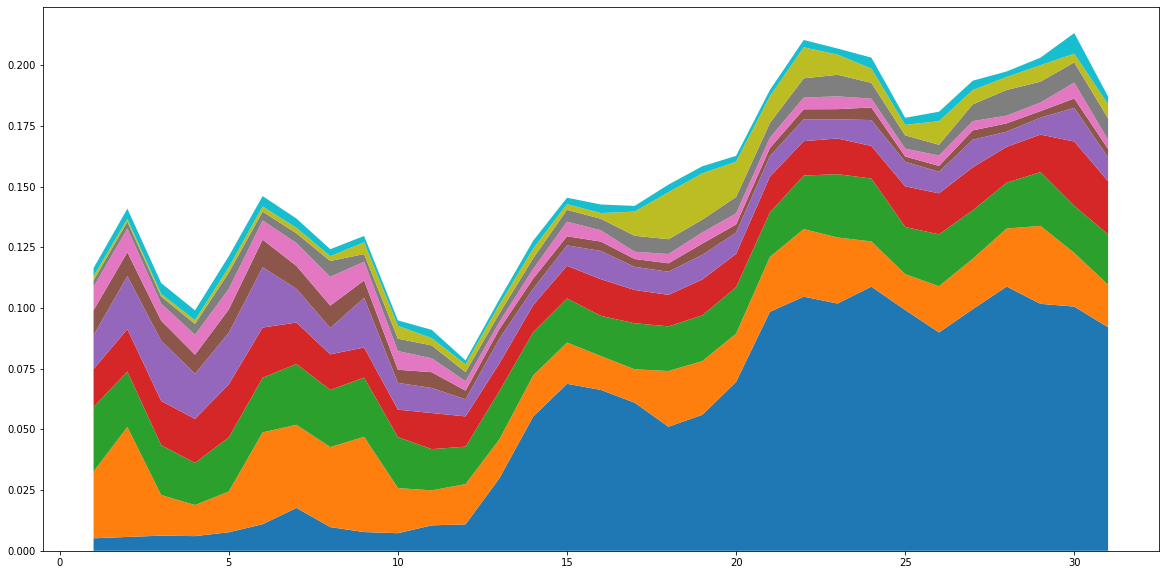

In [412]:
ntopics = 10

fig, ax = plt.subplots(1,1,figsize=(20,10))
x = np.arange(1,32)
y = []
for clusterId in range(ntopics):
    # append the y values for each cluster
    y.append(list(clusters_by_day[clusterId].values()))

y_norm = np.array(y) / np.array(list(totals_by_day.values()))
# y_norm = np.array(y) / np.sum(np.array(y), axis=0)

plt.stackplot(x,y_norm, labels=np.arange(ntopics))
# plt.legend()
plt.show()

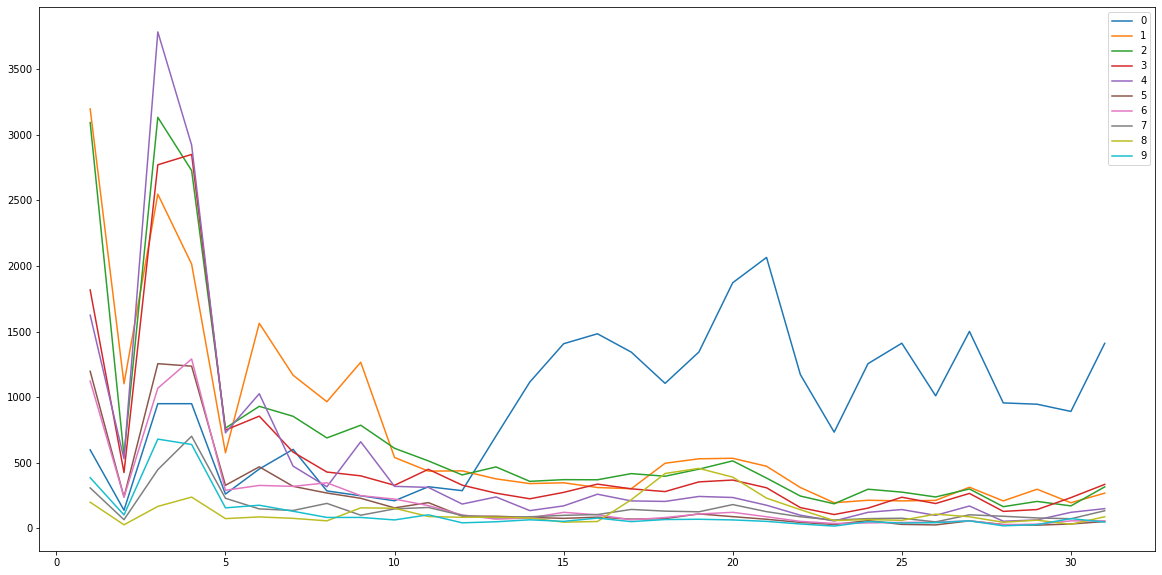

In [413]:
ntopics = 10

fig, ax = plt.subplots(1,1,figsize=(20,10))
x = np.arange(1,32)
y = []
for clusterId in range(ntopics):
    # append the y values for each cluster
#     y.append(list(clusters_by_day[clusterId].values()))
    plt.plot(x,list(clusters_by_day[clusterId].values()))

# y_norm = np.array(y) / np.array(list(totals_by_day.values()))
# y_norm = np.array(y) / np.sum(np.array(y), axis=0)

# plt.plot(x,y_norm, labels=np.arange(ntopics))
plt.legend(x-1)
plt.show()

**Write file for StreamGraph**

In [319]:
# ntopics
with open('topics_stream.csv', 'w') as f:
    f.write('date,{}\n'.format(','.join([str(i) for i in range(ntopics)])))
    
    for d in range(1,32):
        f.write('{},{}\n'.format(d, ','.join([str(y_norm[i][d-1]) for i in range(ntopics)])))

**Ranking Plot**

In [524]:
def get_ranks_by_day(by_day):
    nclusters = len(by_day)
    ranks_by_day = {i:{d:0 for d in range(1,32)} for i in range(nclusters)}

    for d in range(1,32):
        # get ranks for this day
        counts = [by_day[c][d] for c in range(nclusters)]
        ranks = np.argsort(counts)[::-1]
        rank_dict = {r:i for i,r in enumerate(ranks)}

        for i in range(nclusters):
            ranks_by_day[i][d] = rank_dict[i]
    return ranks_by_day


In [525]:
ranks_by_day1 = get_ranks_by_day(clusters_by_day)

In [414]:
ranks_by_day = {i:{d:0 for d in range(1,32)} for i in range(len(communities))}

for d in range(1,32):
    # get ranks for this day
    counts = [clusters_by_day[c][d] for c in range(len(communities))]
    ranks = np.argsort(counts)[::-1]
    rank_dict = {r:i for i,r in enumerate(ranks)}
#     rank_dict
    
    for i in range(len(communities)):
        ranks_by_day[i][d] = rank_dict[i]

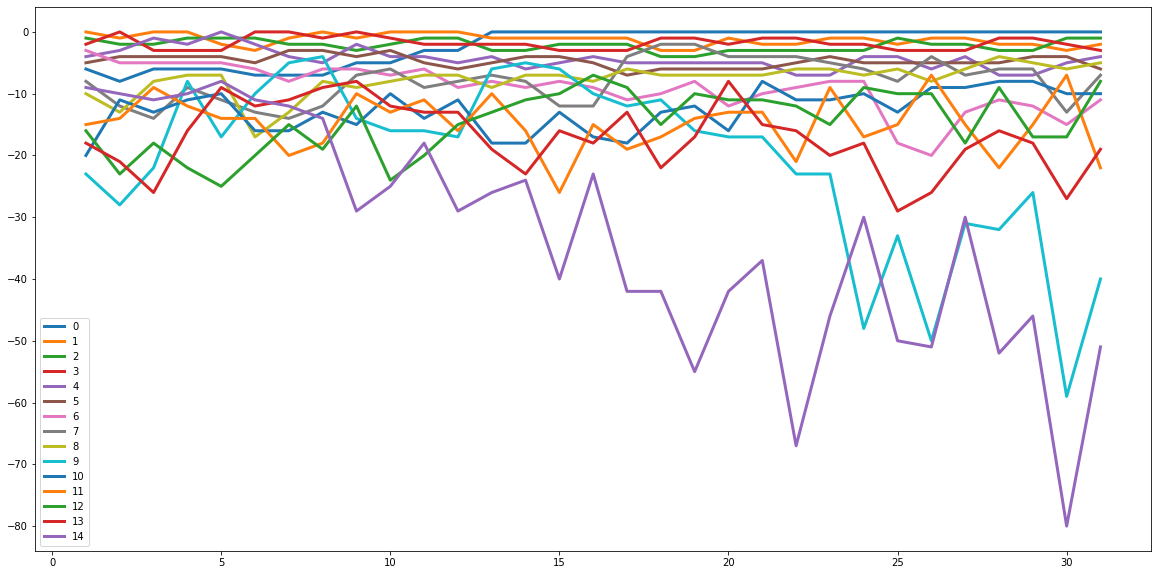

In [531]:
ntopics = 15

fig, ax = plt.subplots(1,1,figsize=(20,10))
x = np.arange(1,32)
y = []
for clusterId in range(ntopics):
    plt.plot(x,[-y for y in list(ranks_by_day1[clusterId].values())], linewidth='3')

plt.legend(x-1)
plt.show()

### Save for import to d3

In [416]:
ntopics = 50
with open('../data/topics_timeline_v1.csv', 'w') as f:
    f.write('name,{}\n'.format(','.join([str(i) for i in range(1,32)])))
    
    for cid in range(ntopics):
        f.write('topic{},{}\n'.format(cid, ','.join([str(x) for x in list(ranks_by_day[cid].values())])))

In [788]:
topicnames = {
    0: 'Stay Home',
    1: 'Health & Safety',
    2: 'Economy',
    3: 'Trump Virus',
    4: 'Maga',
    5: 'Global Pandemic',
    6: 'Chinese Virus',
    7: 'Music',
    8: 'Supertuesday',
    9: 'NYC',
    10: 'Toilet Paper',
    11: 'Defeat Trump',
    12: 'Tech',
    13: 'Travel',
    14: 'Canada',
    15: 'SXSW',
    16: 'California',
    17: 'Seattle',
    18: 'Wash Hands',
    19: 'AI & Tech',
    20: 'Big Tech',
    21: 'Work from Home',
    22: 'Supply Chain',
    23: 'Florida',
    24: 'Medicare for All',
    25: 'Education & Parenting',
    26: 'n95 masks',
    27: 'Sports',
    28: 'Online Learning',
    29: 'Climate Change',
    30: 'Mental Health',
    31: 'Real Estate',
    32: 'Podcasts',
    33: 'Veterans',
    35: 'Memes',
    40: 'Faith'
}

In [789]:
ntopics = 50

ranks_by_day = get_ranks_by_day(clusters_by_day)
bot_ranks_by_day = get_ranks_by_day(bot_clusters_by_day)
human_ranks_by_day = get_ranks_by_day(human_clusters_by_day)

with open('../data/topics_timeline_v3_all.csv', 'w') as f:
    f.write('name,{}\n'.format(','.join([str(i) for i in range(1,32)])))
    
    for cid in range(min(ntopics, len(ranks_by_day))):
        topic = topicnames[cid] if cid in topicnames else 'topic{}'.format(cid)
        f.write('{},{}\n'.format(topic, ','.join([str(x) for x in list(ranks_by_day[cid].values())])))

with open('../data/topics_timeline_v3_bot.csv', 'w') as f:
    f.write('name,{}\n'.format(','.join([str(i) for i in range(1,32)])))
    
    for cid in range(min(ntopics, len(bot_ranks_by_day))):
        topic = topicnames[cid] if cid in topicnames else 'topic{}'.format(cid)
        f.write('{},{}\n'.format(topic, ','.join([str(x) for x in list(bot_ranks_by_day[cid].values())])))
        
with open('../data/topics_timeline_v3_human.csv', 'w') as f:
    f.write('name,{}\n'.format(','.join([str(i) for i in range(1,32)])))
    
    for cid in range(min(ntopics, len(human_ranks_by_day))):
        topic = topicnames[cid] if cid in topicnames else 'topic{}'.format(cid)
        f.write('{},{}\n'.format(topic, ','.join([str(x) for x in list(human_ranks_by_day[cid].values())])))
        
        

In [334]:
counts = [clusters_by_day[c][1] for c in range(len(communities))]
ranks = np.argsort(counts)[::-1]
rank_dict = {r:i for i,r in enumerate(ranks)}
rank_dict
    
    

{4: 0,
 1: 1,
 6: 2,
 2: 3,
 3: 4,
 5: 5,
 7: 6,
 8: 7,
 0: 8,
 25: 9,
 9: 10,
 22: 11,
 13: 12,
 11: 13,
 17: 14,
 23: 15,
 15: 16,
 26: 17,
 10: 18,
 33: 19,
 30: 20,
 18: 21,
 37: 22,
 44: 23,
 19: 24,
 59: 25,
 20: 26,
 12: 27,
 101: 28,
 49: 29,
 14: 30,
 28: 31,
 42: 32,
 40: 33,
 21: 34,
 51: 35,
 31: 36,
 16: 37,
 24: 38,
 185: 39,
 45: 40,
 32: 41,
 62: 42,
 36: 43,
 27: 44,
 35: 45,
 41: 46,
 92: 47,
 29: 48,
 64: 49,
 43: 50,
 84: 51,
 52: 52,
 89: 53,
 47: 54,
 63: 55,
 48: 56,
 102: 57,
 68: 58,
 55: 59,
 142: 60,
 56: 61,
 66: 62,
 132: 63,
 39: 64,
 144: 65,
 159: 66,
 50: 67,
 116: 68,
 100: 69,
 226: 70,
 180: 71,
 105: 72,
 61: 73,
 86: 74,
 184: 75,
 85: 76,
 138: 77,
 46: 78,
 70: 79,
 157: 80,
 77: 81,
 60: 82,
 148: 83,
 108: 84,
 97: 85,
 87: 86,
 38: 87,
 124: 88,
 233: 89,
 119: 90,
 272: 91,
 34: 92,
 106: 93,
 133: 94,
 213: 95,
 93: 96,
 79: 97,
 111: 98,
 58: 99,
 231: 100,
 73: 101,
 181: 102,
 110: 103,
 90: 104,
 53: 105,
 169: 106,
 69: 107,
 177: 108,
